Python|Machine learning|Ensemble methods

PROBLEM OVERVIEW


*   There are multiple factors that affect the person who is diagnosed with the disease so scientists research is still at the beginning stages to understand the exact cause of the disease.Main warning signs of this disease is loss of memory and other cognitive impairments.Brain MRI can detect the mild cognitive impairments which can potentially develop Alzheimer’s disease. In the laboratory radiologists analyse these high resolution MRI images for abnormalities however,  this process is cumbersome and time consuming most importantly it is prone to human error.As per recent survey 5-10% of biomedical images are overlooked the pathologists. 








DATA

* Dataset is collected from kaggle original source of the dataset is Open Access Series of Imaging Studies (OASIS)

*   This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.


















Download [here](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers?select=oasis_cross-sectional.csv)

Dataset description:  
------------------longitudinal data ---------------    
visits: Number of visits to the doctor.    
MR delay:     
M/F : Gender of the patient.    
Hand: Dominant hand of the patient(left or right).    
Age: Age of the patient.      
EDUC : educcational level of the patient.    
SES: Socio economic status 
MMSE: Mini Mental State Examination   
CDR: Clinical Dementia Rating   
eTIV: Estimated Total Intracranial Volume.   
nWBV: Normalize Whole Brain Volume   
ASF: Atlas scaling factor 


**sociodemographic features:** 

1. Gender: {0 = Female, 1 = Male}, 100% complete (416 of 416);

2. Age: (18, 96) years of age.  

3. Education: 
> 1 < high school (HS), 2 = HS Graduate, 3 = Some College, 4 = College Graduate, 5 = Beyond College Graduate

4. Socioeconomic Status (SES): (1 = lower, 2 = lower middle, 3 = middle, 4 = upper middle, 5 = upper)

5. Hand: Dominant hand of the patient

**Clinical Predictor Variables:**

6. Mini-mental state exam (MMSE): (0,30). The MMSE is a 30-point questionnaire.  that has been shown to be valid and reliable in identifying dementia [7,23].   

7. Atlas scaling factor (ASF): (0.88–1.56) (observed). The ASF is a one-parameter scaling factor that allows for comparison of the estimated total intracranial volume (eTIV) based on differences in human anatomy.  

8. Estimated total intracranial volume (eTIV): (1132–1992) mm3 [24]. The eTIV variable estimates intracranial brain volume.  

9. Normalized whole brain volume (nWBV): (0.64–0.90) mg (observed). This variable measures the volume of the whole brain.

10. visits: Number of visits to the doctor.

11. MR delay :   

12. Group: Group is the target variable divided into Demented, Non demented and  converted. 
















## Project structure


1.   Data cleaning /Data preprocessing
2.   Exploratory data analysis(EDA)
3.   Cross validation
4.   Ensemble methods
5.   Comparative analysis




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing dependencies

In [ ]:
import pandas as pd # data analysis
import numpy as np # linear operations

#scikit learn for model creation and data processing
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


#Data visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#ignoring warning
import warnings
warnings.filterwarnings("ignore")

#model saving
import pickle


## Data loading.....

In [ ]:
longitudinal_data = pd.read_csv('/content/drive/MyDrive/UCM projects/Sep-Dec 2022/Alzheimer/dataset/oasis_longitudinal.csv')

In [ ]:
#sample data
longitudinal_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
#descriptive statistics of data
longitudinal_data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## Data preprocessing

In [ ]:
# renaming the M/F column as gender
longitudinal_data.rename(columns = {'M/F':'gender'},inplace= True)


In [ ]:
# dropping the ID column
longitudinal_data.drop(['Subject ID','MRI ID',],inplace=True,axis=1)

In [ ]:
#dataframe information
#columns null values data types
longitudinal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    object 
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   gender    373 non-null    object 
 4   Hand      373 non-null    object 
 5   Age       373 non-null    int64  
 6   EDUC      373 non-null    int64  
 7   SES       354 non-null    float64
 8   MMSE      371 non-null    float64
 9   CDR       373 non-null    float64
 10  eTIV      373 non-null    int64  
 11  nWBV      373 non-null    float64
 12  ASF       373 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 38.0+ KB


🔑 Except Group, gender and Hand all other values are numerical values.    
⏭ Next step is to Label encoding the object columns

Label encoding the object columns

In [ ]:
#extracting categorical columns from dataframe
obj_cols = list(longitudinal_data.select_dtypes(include = 'object').columns)


In [ ]:
# unique target values
longitudinal_data['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [ ]:
#instantiate label encoder object
le = LabelEncoder()

#Applying le on categorical columns
encoders = {}
for i in obj_cols:
    encoders[i] = le
    longitudinal_data[i] = encoders[i].fit_transform(longitudinal_data[i])

In [ ]:
label_object = {}
categorical_columns = obj_cols
for col in categorical_columns:
   labelencoder = LabelEncoder()
   labelencoder.fit(longitudinal_data[col])
   longitudinal_data[col] = labelencoder.fit_transform(longitudinal_data[col])
   label_object[col] = labelencoder


In [ ]:
# checking object columns
longitudinal_data[obj_cols]

,Group,gender,Hand
0,2,1,0
1,2,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
368,1,1,0
369,1,1,0
370,2,0,0
371,2,0,0


Encodings:


## Null value visualization

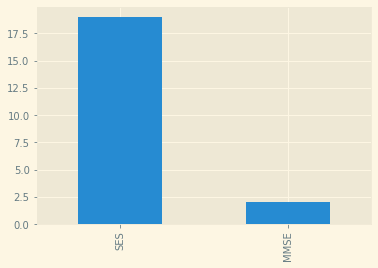

In [ ]:
plt.style.use('Solarize_Light2')
longitudinal_data.isna().sum()[longitudinal_data.isna().sum()>0].plot(kind='bar')
plt.show()


*  Out of 13 parameters 2 parameters have null values
*  SES column has highest null values in the dataset
*   MMSE column has less null values compared to SES column
*  Cleaning and filling the missing values through data imputation  is the next step





Data Imputation

In [ ]:
#filling missing values with median
null_cols = longitudinal_data.columns[longitudinal_data.isnull().any()]
longitudinal_data[null_cols] = longitudinal_data[null_cols].fillna(longitudinal_data[null_cols]).median()

In [ ]:
# checking the sum of null values is equal to zero or not
longitudinal_data.isna().sum().sum()

0

## Exploratory Data Analysis

Analysis of Age feature

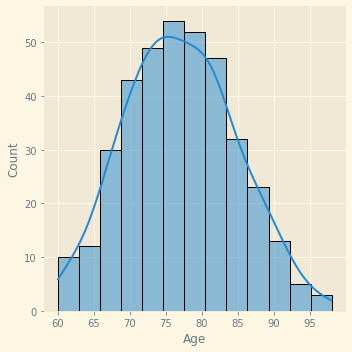

In [ ]:
sns.color_palette("husl", 9)
sns.displot(data = longitudinal_data, x = 'Age',kde = True)
plt.show()

🗒 Maximum distribution is between 75-85

Gender distribution

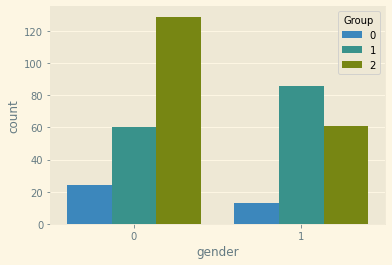

In [ ]:
sns.countplot(data = longitudinal_data, x = 'gender', hue = 'Group')
plt.show()

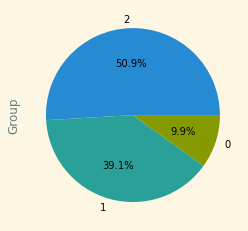

In [ ]:
#distribution of targets
longitudinal_data['Group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

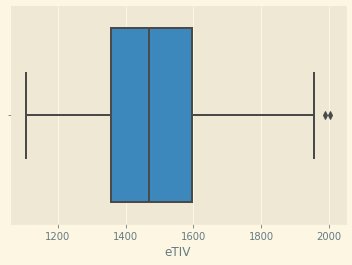

In [ ]:
# eTIV

sns.boxplot(data = longitudinal_data,x='eTIV')
plt.show()

✴ No Outliers

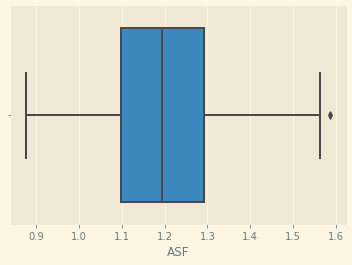

In [ ]:

sns.boxplot(data = longitudinal_data,x='ASF')
plt.show()

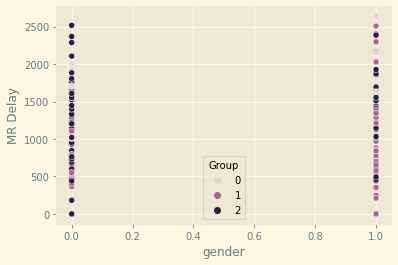

In [ ]:
sns.scatterplot(data=longitudinal_data, y="MR Delay", x="gender",hue = 'Group')
plt.show()

## Data splitting

In [ ]:
X = longitudinal_data.drop('Group',axis=1) #features
y = longitudinal_data['Group'] #targets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
print(f'X_train shape ---{X_train.shape}  X_test.shape-----{X_test.shape}')

X_train shape ---(298, 12)  X_test.shape-----(75, 12)


## Ensemble modelling


*  'Ensemble' in statistical terms considered as a group of similar systems or group of same systems with  different states
*   Ensemble methods use combination of different models to improve the results of machine learning models
> Bagging   
> Boosting  
> Voting classifier 









## Bagging


1.   A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
2. This algorithm encompasses several works from the literature.If samples are drawn with replacement, then the method is known as Bagging

✌ Bagging is effective when the data is limited


In [ ]:

# creating the list of classifiers
rf =RandomForestClassifier() 
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()

estimator_list = [rf,et,knn,svc,rg]


RandomForest classifier

In [ ]:
#model creation and training
bagging_random_forest = BaggingClassifier(rf,max_samples=0.4, max_features=10, random_state=20,oob_score = True)
bagging_random_forest.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_features=10,
                  max_samples=0.4, oob_score=True, random_state=20)

In [ ]:
#predictions and accuracy
y_pred_rf = bagging_random_forest.predict(X_test)
random_forest_accuracy = round(accuracy_score(y_test, y_pred_rf),2)
print('Accuracy of Random Forest is :',random_forest_accuracy)

Accuracy of Random Forest is : 0.89


Extra tree classifier

In [ ]:
#model creation and training
bagging_extra_tree = BaggingClassifier(et,max_samples=0.4, max_features=8, random_state=20,oob_score = True)
bagging_extra_tree.fit(X_train,y_train)

BaggingClassifier(base_estimator=ExtraTreesClassifier(), max_features=8,
                  max_samples=0.4, oob_score=True, random_state=20)

In [ ]:
#predictions and accuracy
y_pred_ex = bagging_extra_tree.predict(X_test)
extra_tree_accuracy =  round(accuracy_score(y_test, y_pred_ex),2)
print('Accuracy of Extra tree classifier is :',extra_tree_accuracy)

Accuracy of Extra tree classifier is : 0.89


RidgeClassifier()

In [ ]:
#model creation and training
bagging_ridge = BaggingClassifier(rg,max_samples=0.4, max_features=10, random_state=20,oob_score = True)
bagging_ridge.fit(X_train,y_train)

BaggingClassifier(base_estimator=RidgeClassifier(), max_features=10,
                  max_samples=0.4, oob_score=True, random_state=20)

In [ ]:
#predictions and accuracy
y_pred_ridge = bagging_ridge.predict(X_test)
ridge_accuracy = round(accuracy_score(y_test, y_pred_ridge),2)
print('Accuracy of ridge classifier is :',ridge_accuracy)

Accuracy of ridge classifier is : 0.89


KNN Classifier

In [ ]:
#model creation and training
bagging_knn = BaggingClassifier(knn,max_samples=0.4, max_features=10, random_state=20,oob_score = True)
bagging_knn.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=10,
                  max_samples=0.4, oob_score=True, random_state=20)

In [ ]:
#predictions and accuracy
y_pred_knn = bagging_knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn),2)
print('Accuracy of ridge classifier is :',knn_accuracy)

Accuracy of ridge classifier is : 0.59


SVM classifier

In [ ]:
#model creation and training
bagging_svm = BaggingClassifier(svc,max_samples=0.4, max_features=10, random_state=20,oob_score = True)
bagging_svm.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), max_features=10, max_samples=0.4,
                  oob_score=True, random_state=20)

In [ ]:
#predictions and accuracy
y_pred_svm = bagging_svm.predict(X_test)
svm_accuracy = round(accuracy_score(y_test, y_pred_svm),2)
print('Accuracy of ridge classifier is :',svm_accuracy)

Accuracy of ridge classifier is : 0.56


## Voting classifiers

In [ ]:

clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.03) [Random Forest]
Accuracy: 0.89 (+/- 0.03) [Extra Trees]
Accuracy: 0.47 (+/- 0.07) [KNeighbors]
Accuracy: 0.51 (+/- 0.01) [SVC]
Accuracy: 0.90 (+/- 0.02) [Ridge Classifier]
Accuracy: 0.89 (+/- 0.03) [Ensemble]


## Boosting Classifiers

*  Boosting method in ensemble technique improves the results by training  the weak learners

> AdaBoost algorithm   
> GradientBoosting algorithm. 







AdaBoost


*   AdaBoost is a Boosting algorithm which is used in classification problems.The weakness of the algorithm is identified by its error rate
*   In each cycle it focuses on misclassified data points and increases the respective points wight so that the next learner can improve the results



Implementation

In [ ]:
#adaboost algorithm
ada_boost = AdaBoostClassifier(n_estimators=10, random_state=0)

In [ ]:
#training
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=0)

In [ ]:
#predictions
y_pred_ada = ada_boost.predict(X_test)

In [ ]:
#test accuracy
ada_boost_accuracy = ada_boost.score(X_test, y_test)

Gradient Boosting

In [ ]:
#gradient boosting algorithm
gradient_boosting = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=0)


In [ ]:
#training
gradient_boosting.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=10,
                           random_state=0)

In [ ]:
#predictions
y_pred_gb = gradient_boosting.predict(X_test)

In [ ]:
# testing accuracy
gradient_boost_accuracy = gradient_boosting.score(X_test,y_test)

## Results Summary

In [ ]:
Accuracies = [random_forest_accuracy,extra_tree_accuracy,ridge_accuracy,
              knn_accuracy,svm_accuracy,ada_boost_accuracy,gradient_boost_accuracy]
clf = ['Random Forest','Extra_tree','Ridge','KNN','SVM','AdaBoost','Gradient Boost']
result = pd.DataFrame({ 'Classifier':clf,'Accuracy': Accuracies})
result.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
6,Gradient Boost,0.893333
0,Random Forest,0.890000
1,Extra_tree,0.890000
2,Ridge,0.890000
3,KNN,0.590000
4,SVM,0.560000
5,AdaBoost,0.520000


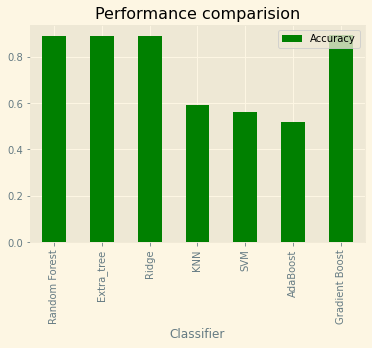

In [ ]:
result.plot(kind = 'bar',
        x = 'Classifier',
        y = 'Accuracy',
        color = 'green')
  
# set the title
plt.title('Performance comparision')
  
# show the plot
plt.show()

👉 Random Forest, extra tree, ridge and Gradint boosting algorithms performed well.    
Next step is to create classification report

Model saving

In [ ]:
#random Forest
pickle.dump(bagging_random_forest, open('rf_bagging.pickle', 'wb'))

# gradient Boosting
pickle.dump(gradient_boosting, open('gb_bagging.pickle', 'wb'))

In [ ]:
#classification report
rf_report = pd.DataFrame(classification_report(y_test, y_pred_rf,output_dict=True)).transpose()
rf_report = rf_report.round(2)
rf_report.to_csv('rf_report.csv',index=True)

ex_report = pd.DataFrame(classification_report(y_test, y_pred_ex,output_dict=True)).transpose()
ex_report = rf_report.round(2)
ex_report.to_csv('ex_report.csv',index=True)

ridge_report = pd.DataFrame(classification_report(y_test, y_pred_ridge,output_dict=True)).transpose()
ridge_report = ridge_report.round(2)
ridge_report.to_csv('ridge_report.csv',index=True)

knn_report = pd.DataFrame(classification_report(y_test, y_pred_knn,output_dict=True)).transpose()
knn_report = knn_report.round(2)
knn_report.to_csv('knn_report.csv',index=True)

svm_report = pd.DataFrame(classification_report(y_test, y_pred_svm,output_dict=True)).transpose()
svm_report = svm_report.round(2)
svm_report.to_csv('svm_report.csv',index=True)

ada_report = pd.DataFrame(classification_report(y_test, y_pred_ada,output_dict=True)).transpose()
ada_report = ada_report.round(2)
ada_report.to_csv('ada_report.csv',index=True)

gb_report = pd.DataFrame(classification_report(y_test, y_pred_gb,output_dict=True)).transpose()
gb_report = gb_report.round(2)
gb_report.to_csv('gb_report.csv',index=True)



## Confusion matrix of best models

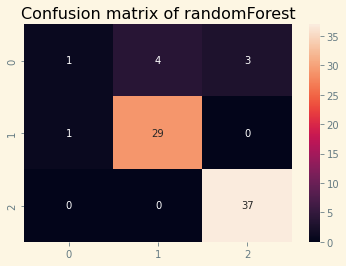

In [ ]:

cf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion matrix of randomForest')
plt.show()

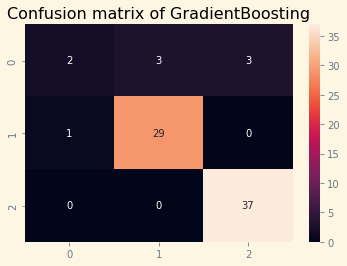

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion matrix of GradientBoosting')
plt.show()

In [ ]:
pd.r

## Conclusion